data source: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston


updated: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system


Features de Dia e Noite durate o ano em Boston,MA.
https://www.timeanddate.com/sun/usa/boston



Exemplos
Oleksandr Kosovan
https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering

rgriffin
https://www.kaggle.com/heesoo37/boston-crimes-starter-eda

In [38]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from workalendar.usa import UnitedStates
from datetime import datetime




In [20]:
crimes = pd.read_csv('crime.csv', encoding = "ISO-8859-1")
offense_codes = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
crimes

In [ ]:
offense_codes

### Data wrangling/Data munging

In [ ]:
crimes['OCCURRED_ON_DATE'] = pd.to_datetime(crimes['OCCURRED_ON_DATE'])


### Data Analysis

Qual é o local da cidade com maior quantidade de ocorrências. Pode ser rua, avenida ou outro tipo.

In [ ]:
crimes.info()

In [ ]:
offense_codes.info()

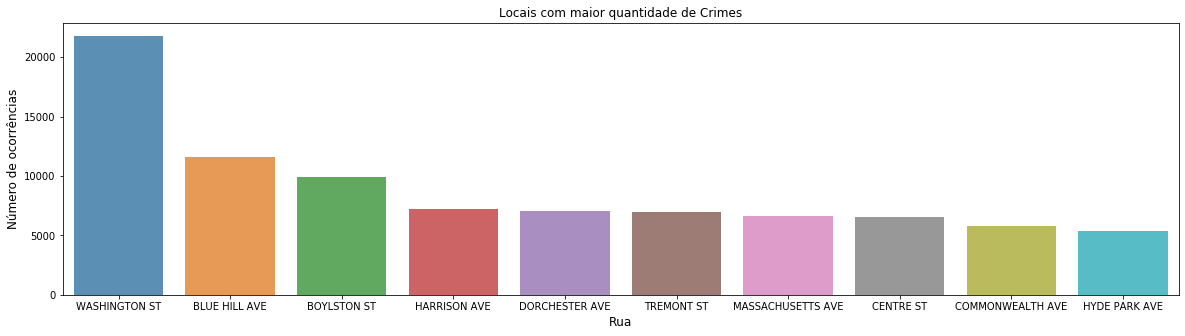

In [30]:
crime_count  = crimes['STREET'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Locais com maior quantidade de Crimes')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Rua', fontsize=12)
plt.show()

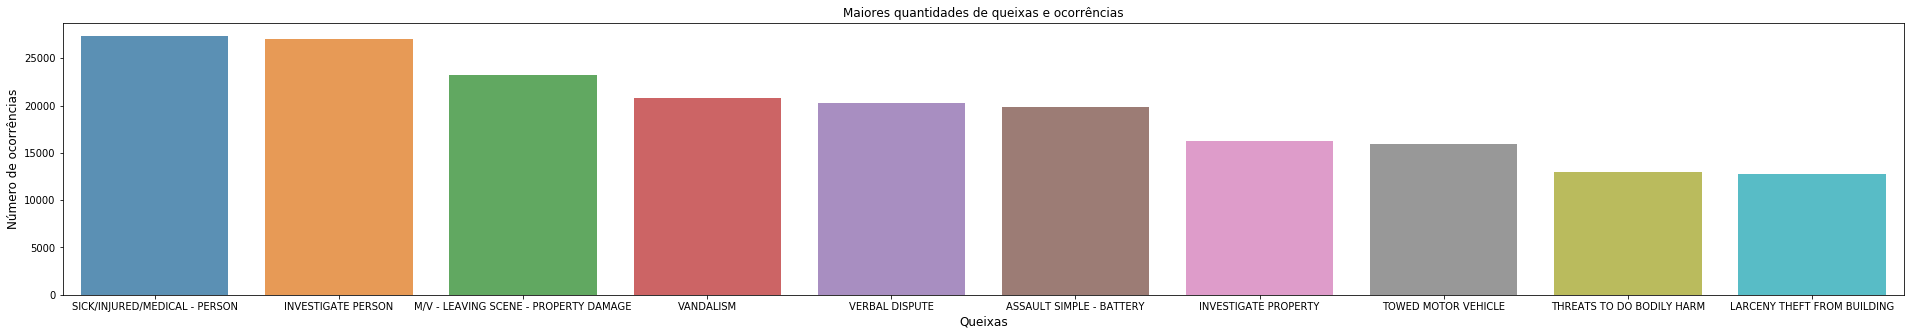

In [31]:
crime_count  = crimes['OFFENSE_DESCRIPTION'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(33,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Maiores quantidades de queixas e ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Queixas', fontsize=12)
plt.show()

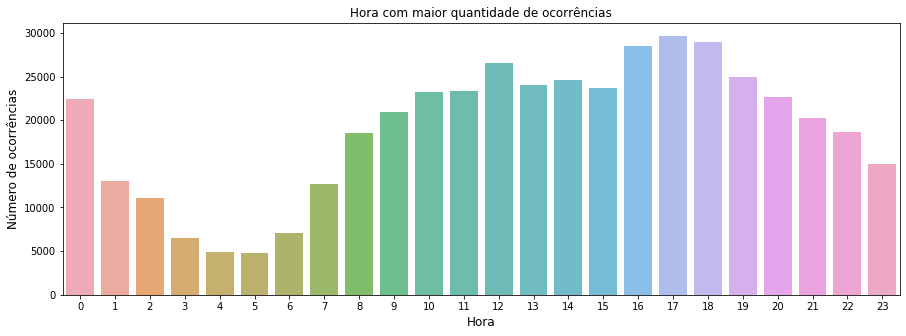

In [32]:
crime_count  = crimes['HOUR'].value_counts()
crime_count = crime_count[:24,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Hora com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.show()

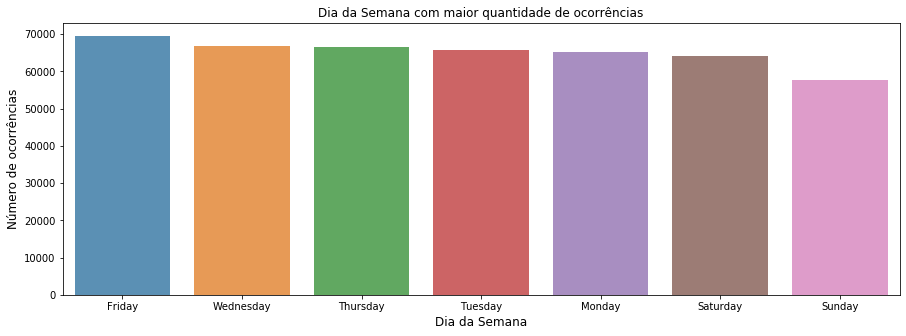

In [33]:
crime_count  = crimes['DAY_OF_WEEK'].value_counts()
crime_count = crime_count[:7,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Dia da Semana com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Dia da Semana', fontsize=12)
plt.show()

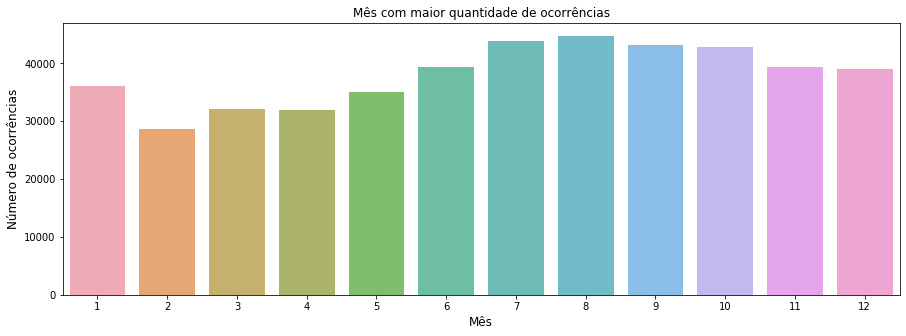

In [34]:
crime_count  = crimes['MONTH'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Mês com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.show()

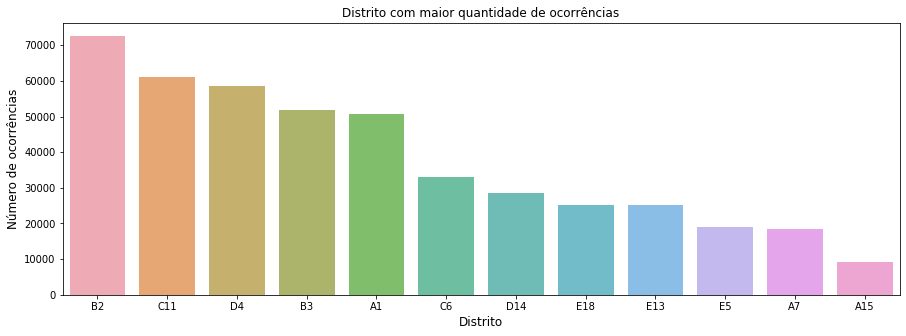

In [35]:
crime_count  = crimes['DISTRICT'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Distrito com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Distrito', fontsize=12)
plt.show()

Distribuição das ocorrências em um mapa da cidade de Boston. No gráfico demostra a ocorrência em Latitude e Longitude.

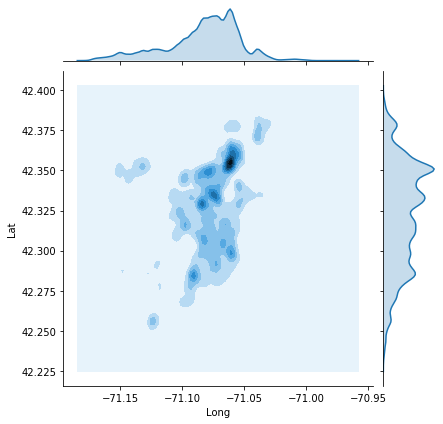

In [36]:
location_shoot = crimes[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x_shoot, y_shoot, kind='scatter')
#sns.jointplot(x_shoot, y_shoot, kind='reg')
#sns.jointplot(x_shoot, y_shoot, kind='resid')
#sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

### Feature Engeneering

Criação de features interessantes que poder ser utilizadas na interpretação de eventos e que poderão ser úteis no para o modelo. 

#### Dia e Noite

A primeira que será criada é Dia ou Noite, ou seja, a ocorrêcia se deu em durante o dia ou durante a noite.

1.Definição das variáveis como valores padrões

In [24]:
crimes['Day'] = 0
crimes['Night'] = 0

2.Marcação dos dados

In [25]:
# Day or night for 1st month
crimes['Day'].loc[(crimes['MONTH'] == 1) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 18)] = 1

# Day or night for 2st month
crimes['Day'].loc[(crimes['MONTH'] == 2) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 19)] = 1

# for 3st month
crimes['Day'].loc[(crimes['MONTH'] == 3) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 20)] = 1

# Day or night for 4st month
crimes['Day'].loc[(crimes['MONTH'] == 4) & (crimes['HOUR'] >= 5) & (crimes['HOUR'] <= 20)] = 1

# Day or night for 5st month
crimes['Day'].loc[(crimes['MONTH'] == 5) & (crimes['HOUR'] >= 5) & (crimes['HOUR'] <= 21)] = 1

# Day or night for 6st month
crimes['Day'].loc[(crimes['MONTH'] == 6) & (crimes['HOUR'] >= 4) & (crimes['HOUR'] <= 21)] = 1

# Day or night for 7st month
crimes['Day'].loc[(crimes['MONTH'] == 7) & (crimes['HOUR'] >= 5) & (crimes['HOUR'] <= 21)] = 1

# Day or night for 8st month
crimes['Day'].loc[(crimes['MONTH'] == 8) & (crimes['HOUR'] >= 5) & (crimes['HOUR'] <= 21)] = 1

# Day or night for 9st month
crimes['Day'].loc[(crimes['MONTH'] == 9) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 20)] = 1

# Day or night for 10st month
crimes['Day'].loc[(crimes['MONTH'] == 10) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 19)] = 1

# Day or night for 11st month
crimes['Day'].loc[(crimes['MONTH'] == 11) & (crimes['HOUR'] >= 6) & (crimes['HOUR'] <= 17)] = 1

# Day or night for 12st month
crimes['Day'].loc[(crimes['MONTH'] == 12) & (crimes['HOUR'] >= 7) & (crimes['HOUR'] <= 17)] = 1


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


3.Marcação dos dados, quando for noite marca 1.

In [26]:
crimes['Night'].loc[crimes['Day']==0]=1

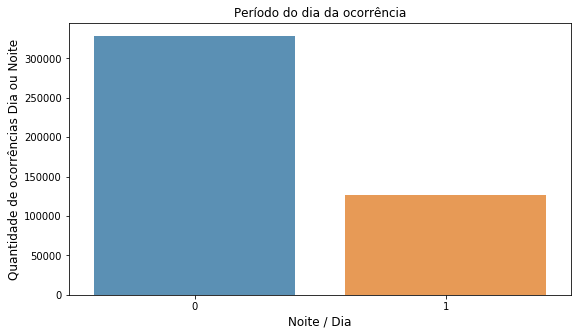

In [27]:
crime_count  = crimes['Night'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(9,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Período do dia da ocorrência')
plt.ylabel('Quantidade de ocorrências Dia ou Noite', fontsize=12)
plt.xlabel('Noite / Dia', fontsize=12)
plt.show()

#### Feriados Nacionais

A segunda feature que será criada é Feriados (Holidays), a experiência policial afirma que grande parte das ocorrências ocorrem nos feriados. São diversas classes de eventos que podem ser classificados dos mais brandos a o mais graves. Os feriados nacionais me questão são dos Estados Unidos da Américas (USA), no Estado de Massachusetts acrescenta o dia Patriot's Day, dia em que ocorre a Boston Marathon.

In [21]:
start = crimes['OCCURRED_ON_DATE'].min()
start_year = start.year  # Assuming dates are Timestamp objects.
end = crimes['OCCURRED_ON_DATE'].max()
end_year = end.year 

holidays = set(holiday[0] 
               for year in range(start_year, end_year + 1)
               for holiday in cal.holidays(year)
               if start.date() <= holiday[0] <= end.date())

crimes['Holiday'] = crimes['OCCURRED_ON_DATE'].isin(holidays)

### https://stackoverflow.com/questions/57403835/pandas-using-workalendar-to-check-if-a-date-is-a-holiday-and-assigning-boolean?noredirect=1&lq=1

#### Informações Climáticas